<a href="https://colab.research.google.com/github/AbrahamKong/CMPE258-Deep_Network_from_scratch/blob/main/CMPE258_Deep_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 layer deep neural network for non linear regression - numpy

In [1]:
import numpy as np
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 6, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]

### Function

In [33]:
# Use Gradiant Descent to learn weights and bias that minimize the loss function

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. *(self.y_pred - self.y_true) / n
    print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

In [34]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros((1))

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    print('Lineaer forward', x.shape, self.weights.shape, output.shape)
    return output

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [35]:
def sigmoid(x):
  return 1/1(1 + np.exp(-x))

In [36]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output

  def backward(self, output_gradiant):
    # import pdb; pdb.set_trace(). #this is how you can debug
    self.input_gradient = (self.input_ > 0) * output_gradiant
    return self.input_gradient

In [37]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [46]:
def plot_4d(x, y, z, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # img = ax.scatter(x, y, z, cmap=plt.hot())
  # fig.colorbar(img)
  # plt.show()
  ax.scatter(x, y, z, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [8]:
relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Initialize the Data

In [42]:
n = 100
d = 2
d_3dim = 3
x = np.random.uniform(-1, 1, (n, d))
y = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

# z = w_x * x + w_y * y + b
# z = w_x_0 * x_0 + w_x_1 * x_1 + w_y_0 * y_0 + w_y_1 * y_1 + b
# z = w_x@x + w_y@y + b

weights_true = np.array([[2, -1], ]).T
weights_true_y = np.array([[-3, 5], ]).T
bias_true = np.array([0.5])
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}')

x: (100, 2), weights: (2, 1), bias: (1,)


In [22]:
y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y_true: {y_true.shape}')

x: (100, 2), weights: (2, 1), bias: (1,), y_true: (100, 1)


In [44]:
z = y @ weights_true_y + x @ weights_true + bias_true
print(f'x: {x.shape}, weights_x: {weights_true.shape}, y: {y.shape}, weights_y: {weights_true_y}, bias: {bias_true.shape}, y_true: {z.shape}')

x: (100, 2), weights_x: (2, 1), y: (100, 2), weights_y: [[-3]
 [ 5]], bias: (1,), y_true: (100, 1)


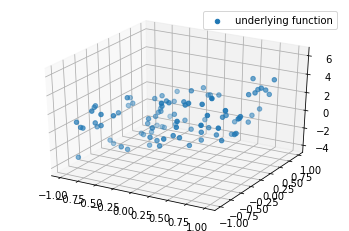

In [26]:
plot_3d(x, y_true)

In [29]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))

7.134104773253183


In [31]:
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

Linear backward (100, 1) (100, 3) (3, 1) (1,)
6.090435837381949


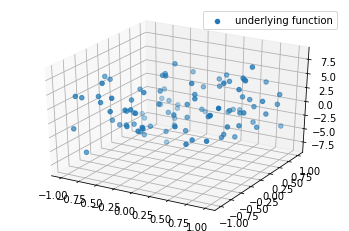

In [48]:
plot_3d(x, z)

# 3 layer deep neural network for non linear regression - pytorch without builtin layer functionality 

# 3 layer deep neural network for non linear regression - pytorch with builtin layer functionality 

# 3 layer deep neural network for non linear regression - pytorch lightening version

# 3 layer deep neural network for non linear regression - TensorFlow